In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check for Outliers and Skewness(0 > log transform; 0.5 > square root transform)
from scipy.stats import zscore, boxcox

# Data Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#MultiOutput Regressor Model
from sklearn.multioutput import MultiOutputRegressor

# ML Algorithms
#Importing all the model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

# Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [2]:
df_train = pd.read_excel('Data_Train.xlsx')
df_test = pd.read_excel('Test_set.xlsx')

In [3]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [5]:
#Checking the shape of train and test data

print('Train_data:',df_train.shape)
print('\n')
print('Test_data:',df_test.shape)

Train_data: (10683, 11)


Test_data: (2671, 10)


Observation:
    
Its generally a good idea to combine both train and test data sets into one, perform feature engineering and then divide them later again.

This saves the trouble of performing the same steps twice on test and train.

In [6]:
df=df_train.append(df_test, ignore_index=True)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [7]:
#Checking the shape

print (df_train.shape, df_test.shape, df.shape )

(10683, 11) (2671, 10) (13354, 11)


Finding:
    
In testing data one column is less and that is Price which is our target data.

In [8]:
df.shape

(13354, 11)

In [9]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


Observation:

1. Note that the price is the target variable and missing values are ones in the test set.

2. One row with missing values in Route and Total_Stops.

3. Only Price is float value, all others are string and need to be converted later accoding to fetures value and hypothesis.

<AxesSubplot:>

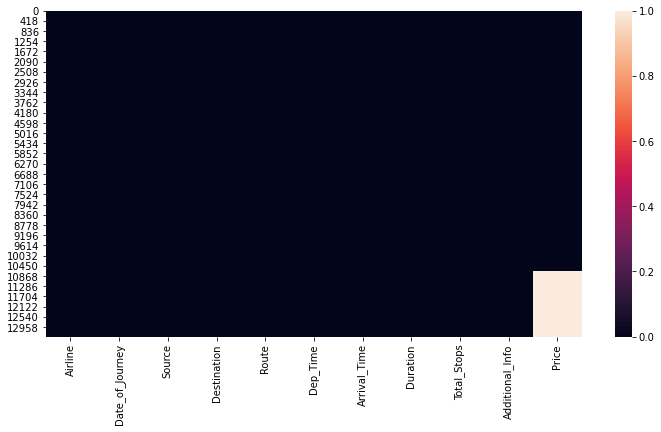

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [14]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [15]:
# Lets treat the null value
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [16]:
df[df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [17]:
# Only one row 9039 null in route and Totl_stops so its drop
df.drop(index=9039, axis=0, inplace=True)
df[df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [18]:
#After drop index 9039 check null value
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

In [19]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Observation:

Price has lot of outliers.

# EXPLORING THE DATA

In [20]:
for i in df.columns:
    print(i)
    print('# of unique values -->', df[i].nunique())
    if df[i].nunique()<15:
        print(df[i].unique())
    else:
        print(df[i].describe())
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

Airline
# of unique values --> 12
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Date_of_Journey
# of unique values --> 44
count          13353
unique            44
top       18/05/2019
freq             633
Name: Date_of_Journey, dtype: object
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Source
# of unique values --> 5
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Destination
# of unique values --> 6
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Route
# of unique values --> 132
count               13353
unique                132
top       DEL → BOM → COK
freq                 3000
Name: 

Observation:
    
We could not parse_dates as the data is not in correct format.

We will extract the required data from string.

# Data Cleaning - 'Date_of_Journey', 'Dep_Time', 'Arrival_Time'

In [21]:

# Since year for 'Date_of_Journey' is the same, we don't need it.
df['Journey_Month'] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Journey_Date'] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Date_of_Journey'].str.split('/').str[2].unique()
df.drop(columns=['Date_of_Journey'], axis=1, inplace=True)

In [22]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Date
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,3,1


In [23]:
df['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '00:20 07 Mar',
       '00:20 02 Apr', '07:45 13 May'], dtype=object)

In [24]:
# Since year for 'Date_of_Journey' is the same, we don't need it.

df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0].astype(int)
df['Arrival_Min'] = df['Arrival_Time'].str.split(':').str[1].astype(int)
df.drop(columns=['Arrival_Time'], axis=1, inplace=True)

In [25]:
df['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [26]:
df['Dep_Time'].value_counts()

18:55    288
17:00    275
10:00    265
07:05    240
07:10    239
        ... 
12:45      1
21:40      1
03:00      1
21:35      1
04:15      1
Name: Dep_Time, Length: 223, dtype: int64

In [27]:
df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_Min'] = df['Dep_Time'].str.split(':').str[1].astype(int)
df.drop(columns=['Dep_Time'], axis=1, inplace=True)

# Data Cleaning - Airline

In [28]:
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

# Data Cleaning - Destination

In [29]:
df['Destination'].value_counts()

Cochin       5681
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

# Data Cleaning - Source

In [30]:
df['Source'].value_counts()

Delhi       5681
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

# Data Cleaning - Total_Stops

In [31]:
df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [32]:
# We can convert this data to numeric values {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
df['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

# Data Cleaning - Route

In [33]:
df['Route'].value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → VNS → DEL → HYD             1
BOM → BBI → HYD                   1
BLR → HBX → BOM → NAG → DEL       1
BOM → IXC → DEL → HYD             1
BOM → BLR → CCU → BBI → HYD       1
Name: Route, Length: 132, dtype: int64

In [34]:
data = df['Route'].str.split(' → ', expand=True)
lst = ['Route0', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5']
data.columns = lst
data.fillna('None', inplace=True)
df = pd.concat([df, data], axis=1)
df.drop(columns=['Route'], axis=1, inplace=True)

In [35]:
# Since we have 'Source' in the dataset, we can remove 'Route0' which is the same as 'Source'.
df.drop(columns=['Route0'], axis=1, inplace=True)

# Data Cleaning - Duaration

In [36]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [37]:
# We can split hours and minutes from Duration

df['Duration_Hrs'] = df['Duration'].str.split('h').str[0].str.strip()
data['Duration_Min'] = df['Duration'].str.split('h').str[1].str.strip()
df['Duration_Min'] = data['Duration_Min'].str.split('m').str[0].str.strip()

df.drop(columns=['Duration'], axis=1, inplace=True)

In [38]:
df['Duration_Hrs'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [39]:
df['Duration_Min'].unique()

array(['50', '25', '', '45', '30', '5', '15', '35', '10', '20', '55',
       '40', nan], dtype=object)

In [40]:
# It is not possible to travel from Mumbai to Hyderabad in 5 minutes. We are going to drop those rows.
df.drop(axis=0, index=df[df['Duration_Hrs']=='5m'].index, inplace=True)

In [41]:
# Replacing all unknown values to 0
val = list(df[df['Duration_Min']==df['Duration_Min'][2]].index)
for i in val:
    df['Duration_Min'][i] = 0

In [42]:
#Convert to numerical value
df['Duration_Hrs'] = df['Duration_Hrs'].astype(int)
df['Duration_Min'] = df['Duration_Min'].astype(int)

# Data Cleaniing - Additional_Info

In [43]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [44]:
# We can replace 'No info' and 'No Info' as 'No_Info'.
df['Additional_Info'].replace({'No info':'No_Info', 'No Info':'No_Info'}, inplace=True)

In [45]:
df['Additional_Info'].value_counts()

No_Info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
2 Long layover                      1
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

In [46]:
#seprate the categorical columns and numerical columns
cat_df, num_df = [], []
for i in df:
    if df[i].dtype=='O':
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
print('>>> Total Number of Features ::', df.shape[1])
print('>>> Number of Categorical Features ::', len(cat_df))
print('>>> Number of Numerical Features ::', len(num_df))

>>> Total Number of Features :: 19
>>> Number of Categorical Features :: 9
>>> Number of Numerical Features :: 10


<AxesSubplot:>

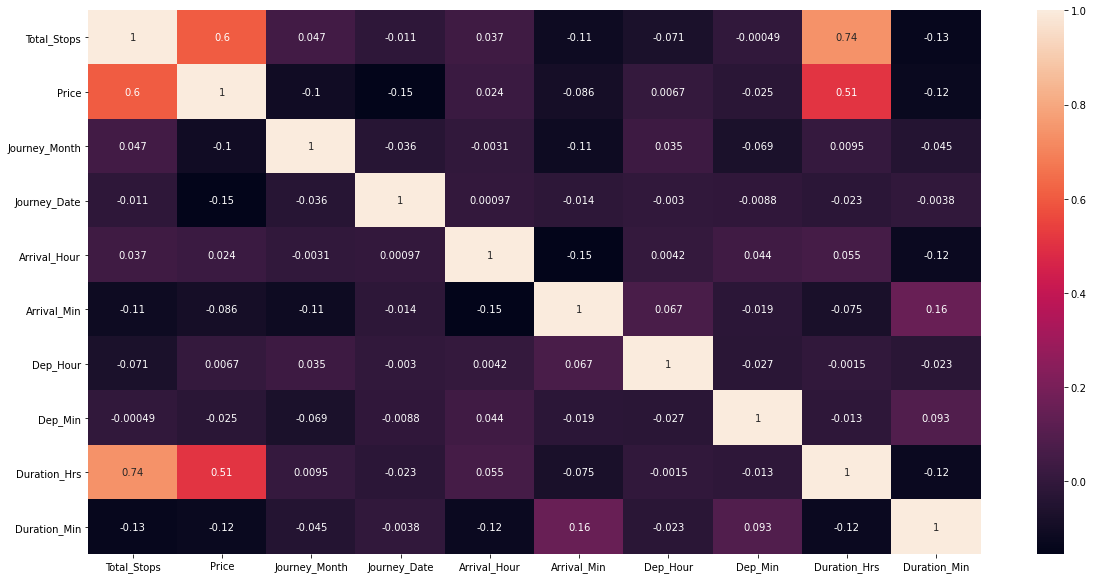

In [47]:
#After converted features with value check coorealtion
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

Observation:

1. Total_Stops and Price are postive coorelated.

2. Total_Stops higly positive correlated with Duration_Hrs and negative correlated with Duration_Min.

3. Price is postive correlated with Duration_Hrs.

Skewness of Total_Stops = 0.32
Skewness of Price = 1.81
Skewness of Journey_Month = -0.39
Skewness of Journey_Date = 0.13
Skewness of Arrival_Hour = -0.38
Skewness of Arrival_Min = 0.11
Skewness of Dep_Hour = 0.11
Skewness of Dep_Min = 0.16
Skewness of Duration_Hrs = 0.86
Skewness of Duration_Min = -0.09


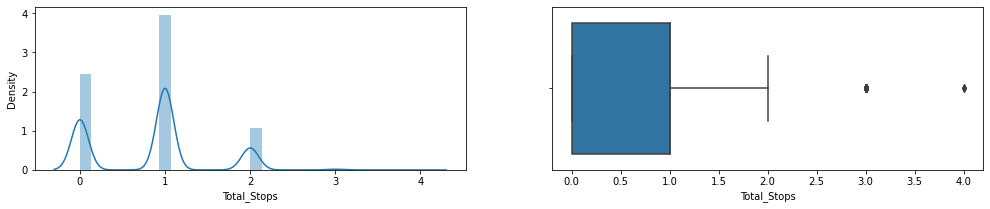

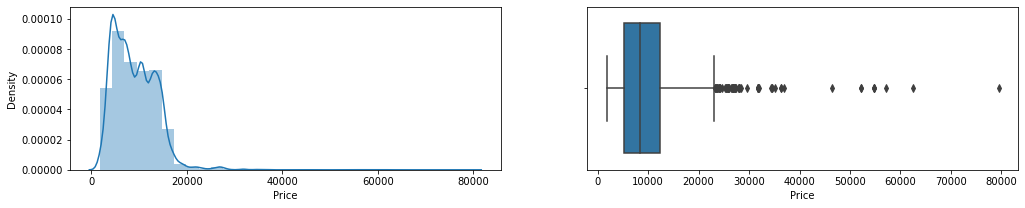

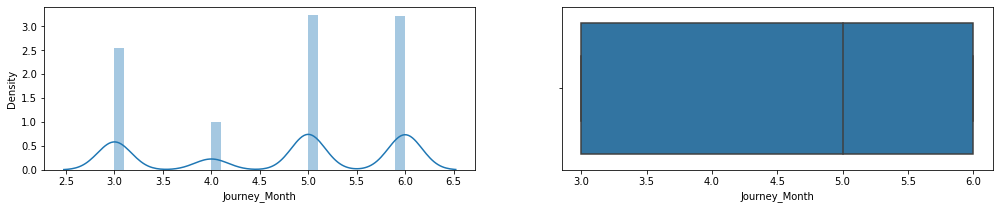

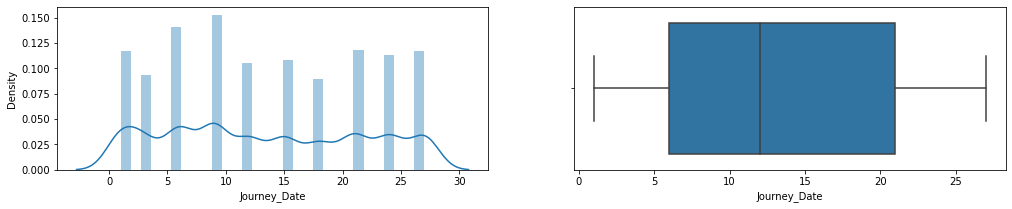

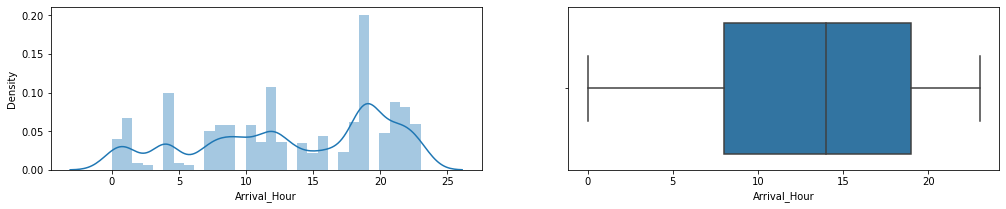

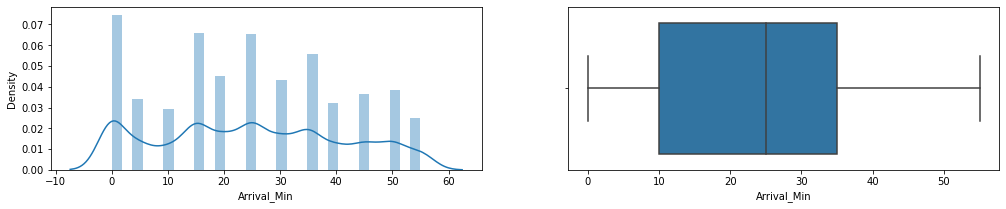

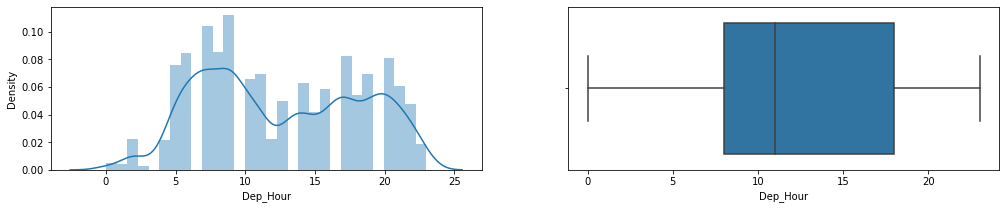

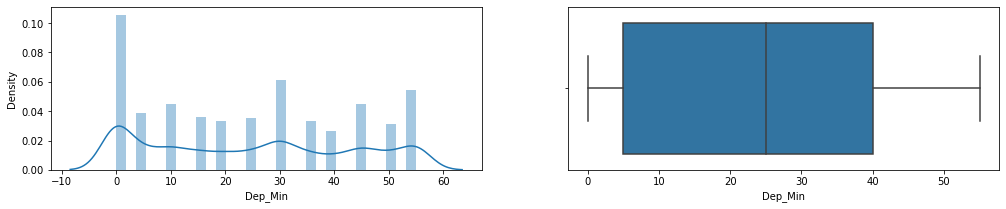

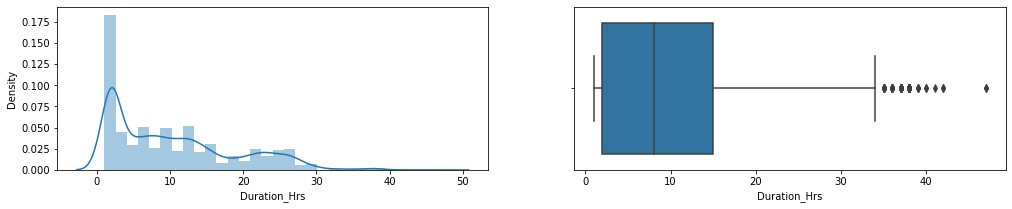

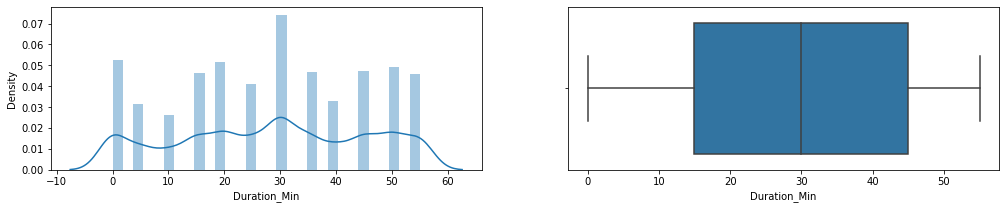

In [48]:
#Univariate analysis of numerical features
for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

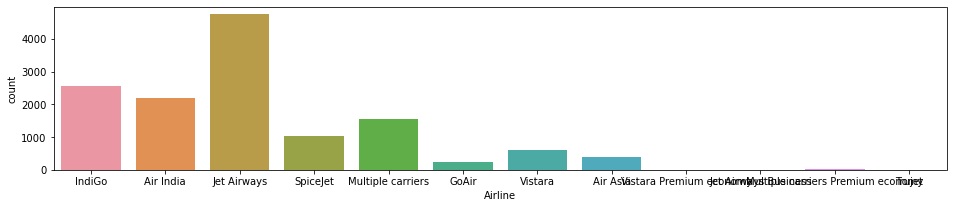

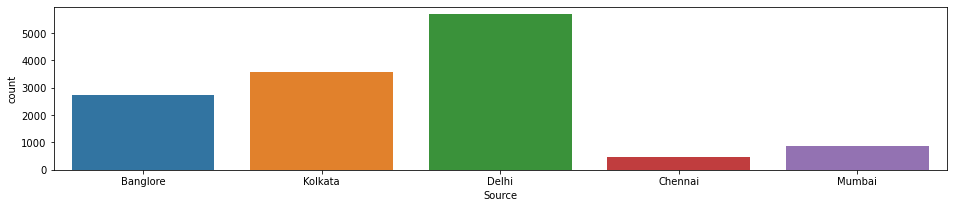

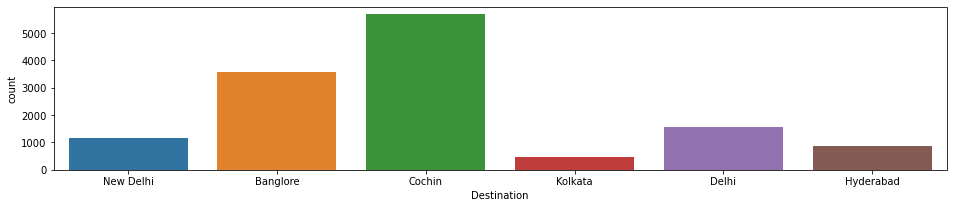

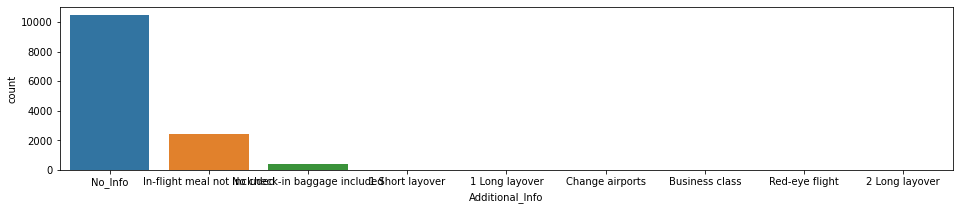

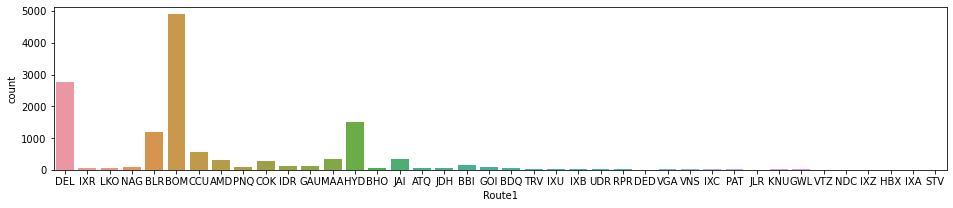

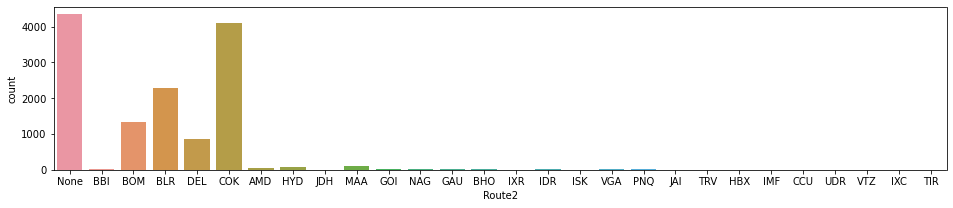

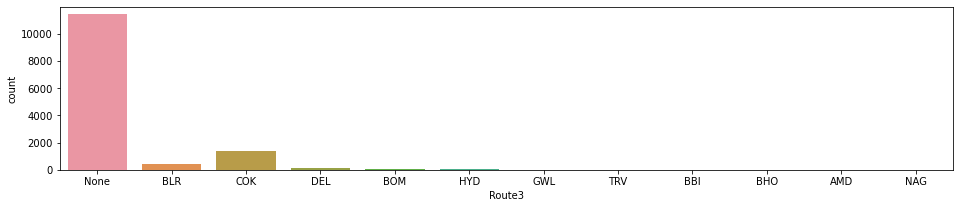

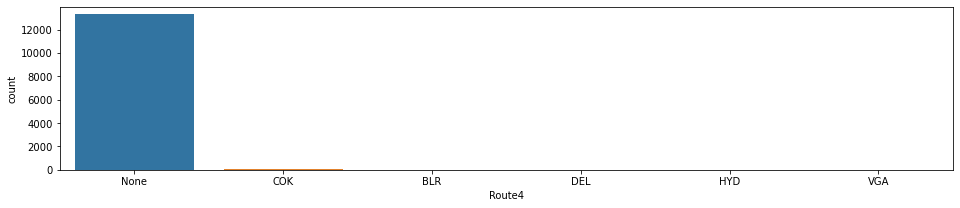

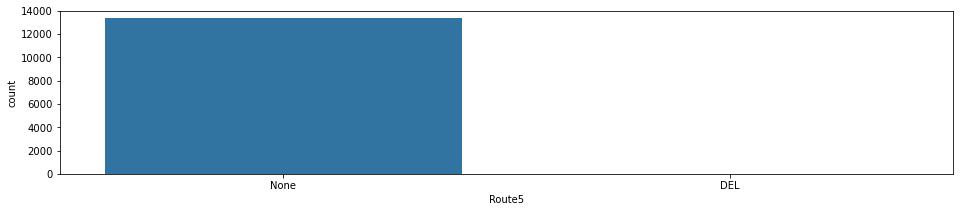

In [49]:
#Univariate analysis of categorical features
for i in cat_df:
    f=plt.figure(figsize=(16,3))
    f.add_subplot(1,1,1)
    sns.countplot(df[i])

# BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Source', ylabel='Price'>

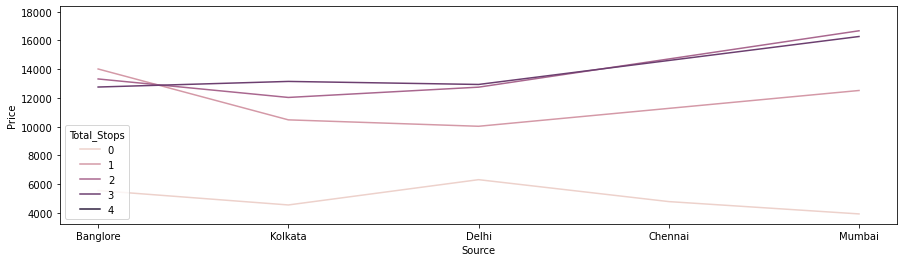

In [50]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Source',y='Price',hue='Total_Stops',data=df, ci=None)

Observation:

1. If Total stop is 0 than journey start from Delhi than ticket price is more than other sourses.

2. If total stops more than 1 than ticket price is more than other source.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

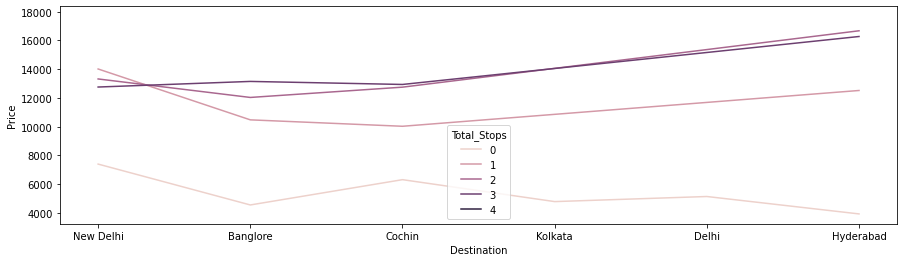

In [51]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Destination',y='Price',hue='Total_Stops',data=df, ci=None)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

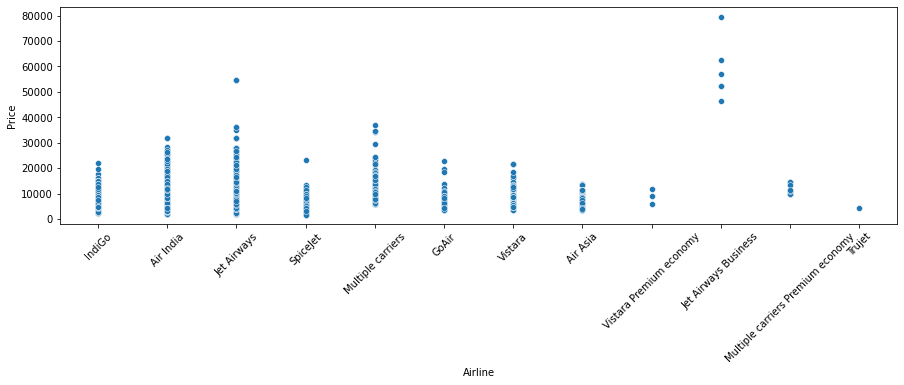

In [52]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=45)
sns.scatterplot(x='Airline',y='Price',data=df)

<AxesSubplot:xlabel='Route1', ylabel='Duration_Hrs'>

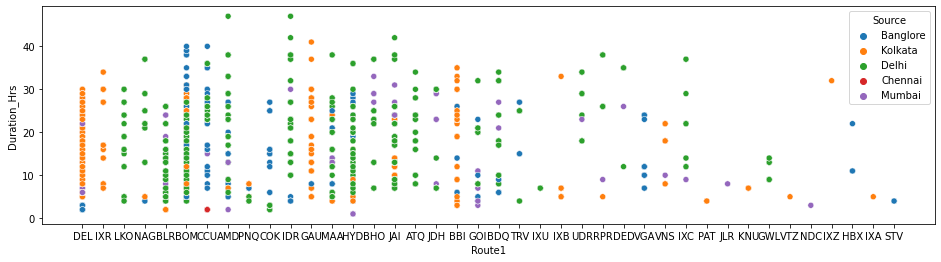

In [53]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Route1', y='Duration_Hrs', data=df, hue='Source')

<AxesSubplot:xlabel='Dep_Hour', ylabel='Arrival_Hour'>

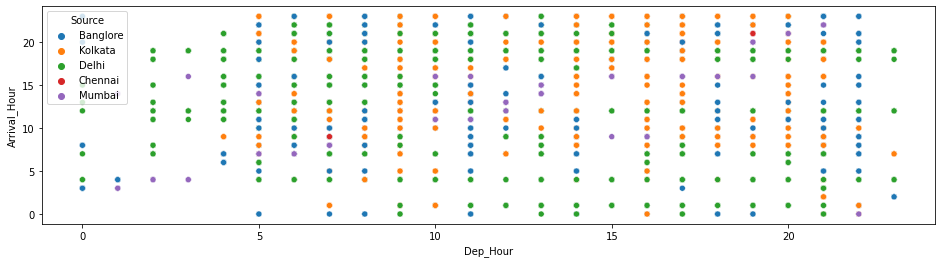

In [54]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Dep_Hour', y='Arrival_Hour', data=df, hue='Source')

<AxesSubplot:xlabel='Dep_Hour', ylabel='Dep_Min'>

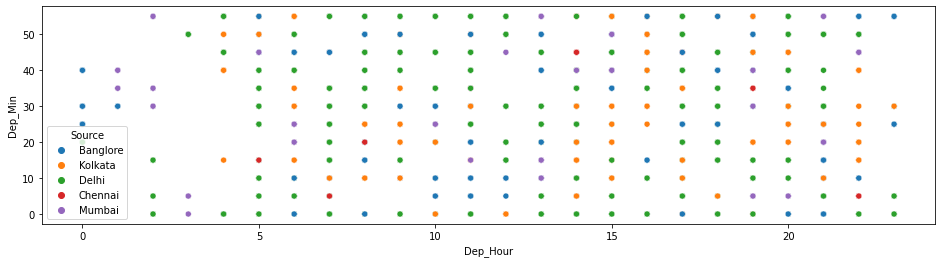

In [55]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Dep_Hour', y='Dep_Min', data=df, hue='Source')

Text(0, 0.5, '% of Stops')

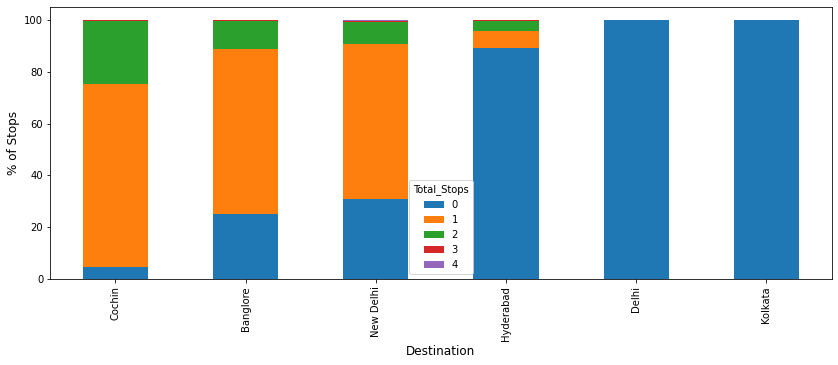

In [56]:
tbl=pd.crosstab(df['Destination'], df['Total_Stops'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('Destination',fontsize=12)
plt.ylabel('% of Stops',fontsize=12)

Observation:

1. For travelling to Cochin without stops not any flight from source.

2. Fo Delhi and kolkata more flight is available from sourse station without stop.

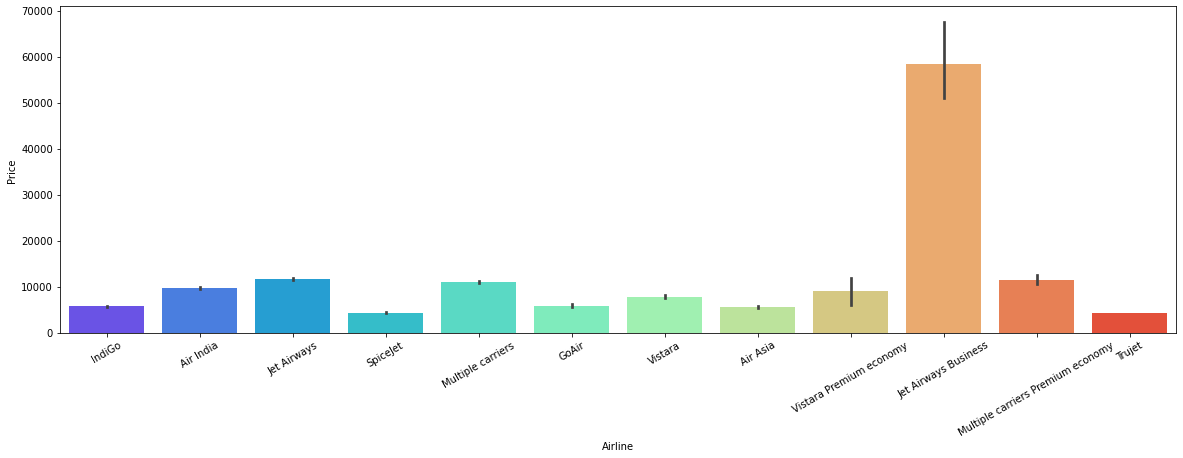

In [57]:
plt.figure(figsize=(20,6))
sns.barplot(x='Airline', y='Price', data=df,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

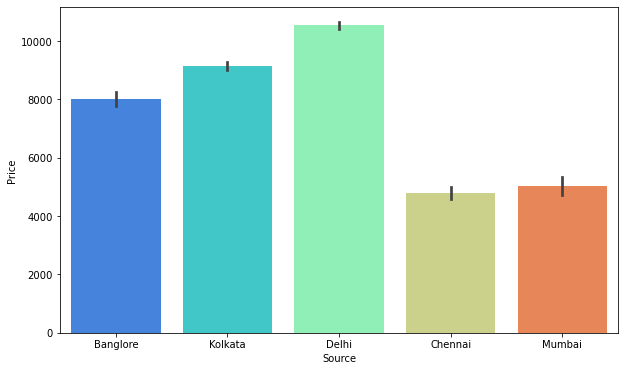

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x='Source', y='Price', data=df,palette='rainbow')
plt.xticks(rotation=0)
plt.show()

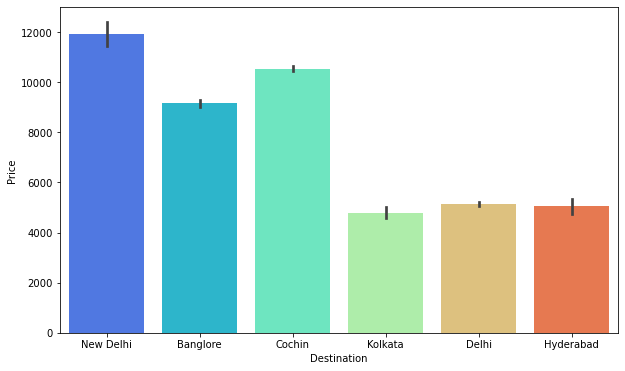

In [59]:
plt.figure(figsize=(10,6))
sns.barplot(x='Destination', y='Price', data=df,palette='rainbow')
plt.xticks(rotation=0)
plt.show()

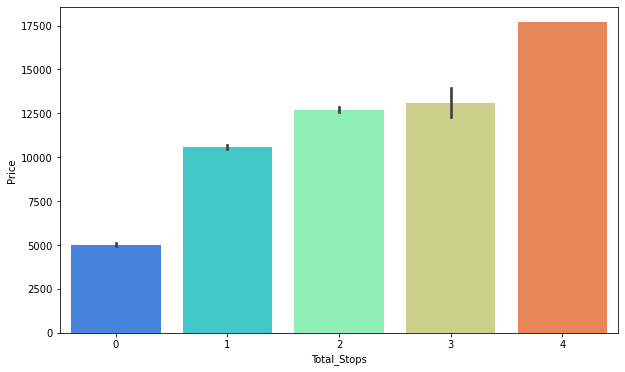

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x='Total_Stops', y='Price', data=df,palette='rainbow')
plt.xticks(rotation=0)
plt.show()

In [61]:
df=pd.get_dummies(df)
df.shape

(13351, 130)

In [62]:
df.shape[0]

13351

In [63]:
df.index = range(0,13351)
df[df['Price'].isna()].head()

,Total_Stops,Price,Journey_Month,Journey_Date,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hrs,Duration_Min,...,Route3_None,Route3_TRV,Route4_BLR,Route4_COK,Route4_DEL,Route4_HYD,Route4_None,Route4_VGA,Route5_DEL,Route5_None
10681,1,NaN,6,6,4,25,17,30,10,55,...,1,0,0,0,0,0,1,0,0,1
10682,1,NaN,5,12,10,20,6,20,4,0,...,1,0,0,0,0,0,1,0,0,1
10683,1,NaN,5,21,19,0,19,15,23,45,...,1,0,0,0,0,0,1,0,0,1
10684,1,NaN,5,21,21,0,8,0,13,0,...,1,0,0,0,0,0,1,0,0,1
10685,0,NaN,6,24,2,45,23,55,2,50,...,1,0,0,0,0,0,1,0,0,1


In [64]:
#Splitting x and y
df_train = df[0:10681]
df_test = df[10681:].drop(columns=['Price'], axis=1)
x = df_train.drop(columns=['Price'], axis=1)
y = df_train['Price']

In [65]:
# Instantiate and scale the data
ss=StandardScaler()
x=ss.fit_transform(x)

In [66]:
# Instanstiate PCA
pca=PCA(n_components=10)
x=pca.fit_transform(x)
x.shape

(10681, 10)

# MODEL TRAINING

In [67]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [68]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(8544, 10) 		 (2137, 10)


In [69]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(8544,) 	 (2137,)


In [70]:
# All Algorithm by using for loop without using grid search cv beacuse dataset very huge and take much time

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('*****************************************************************************************')
    print('\n')

Score of LinearRegression() is: 0.4632823726728541
*****************************************************************************************


Score of SVR() is: 0.09157889221219029
*****************************************************************************************


Score of DecisionTreeRegressor() is: 0.996007246229287
*****************************************************************************************


Score of KNeighborsRegressor() is: 0.8605480143086508
*****************************************************************************************


Score of Lasso() is: 0.4632822425571633
*****************************************************************************************


Score of Ridge() is: 0.46328237241647674
*****************************************************************************************


Score of ElasticNet() is: 0.45951960020809823
*****************************************************************************************


Score of RandomForestRegressor

In [71]:
# Cross Validate All Algorithm by using for loop without parameters

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('************************************************************************************************')
    print('\n')

Model: LinearRegression()
Score: [0.48214329 0.47097179 0.44116086 0.34988104 0.52196112 0.41377429
 0.48238066 0.46415266 0.24193051 0.46706293]
Mean Score: 0.4335419147441188
Standard deviation: 0.07758210045125663
************************************************************************************************


Model: SVR()
Score: [0.11140896 0.091995   0.06908715 0.1215617  0.14025397 0.09509912
 0.12804917 0.13535162 0.10807586 0.09824108]
Mean Score: 0.10991236314143822
Standard deviation: 0.02093182429401276
************************************************************************************************


Model: DecisionTreeRegressor()
Score: [0.72385062 0.72192387 0.71721992 0.7116142  0.75479883 0.58948988
 0.70914097 0.73442179 0.72745527 0.77782907]
Mean Score: 0.7167744423773144
Standard deviation: 0.04686371105455301
************************************************************************************************


Model: KNeighborsRegressor()
Score: [0.74833007 0.78177675 

In [72]:
#Using Random Forest Regressor maximum score achive by using default parameters

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score:",r2_score(y_test,y_pred))
print('\n')

Score: 0.9704290677404164


Mean absolute error: 959.1852992345745
Mean squared error: 3344194.717048353
Root Mean Squared Error: 1828.7139516743325


r2_score: 0.8415956528416589




# Saving the model

In [74]:
import pickle
# open a file, where to store the data
file = open('flight_rf.pkl','wb')

#dump information to that file
pickle.dump(rf,file)